# Happiness Dataset

[Daily Happiness & Employee Turnover](https://www.kaggle.com/harriken/employeeturnover?select=churn.csv)
- churn.csv
- commentInteractions.csv
- comments_clean_anonimized.csv
- votes.csv

In [1]:
!pip3 install matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
# churn.csv
churn_df = pd.read_csv("./data/churn.csv")
churn_df.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True


In [3]:
# commentInteractions.csv
ci_df = pd.read_csv("./data/commentInteractions.csv", dtype={2: object, 3: object})
ci_df.head()

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,true,false,58d0179ae010990004e3806d


In [4]:
# comments_clean_anonimized.csv
cca_df = pd.read_csv("./data/comments_clean_anonimized.csv")
cca_df.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017


In [5]:
# votes
votes_df = pd.read_csv("./data/votes.csv")
votes_df.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


### Data cleaning

In [6]:
# Check shape and type
print("====== churn_df ======")
print(churn_df.shape)
print(churn_df.dtypes)
churn_df.describe()

====== churn_df ======
(4847, 5)
employee                  int64
companyAlias             object
numVotes                  int64
lastParticipationDate    object
stillExists                bool
dtype: object


,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


In [7]:
print("====== ci_df ======")
print(ci_df.shape)
print(ci_df.dtypes)
ci_df.describe()

====== ci_df ======
(336960, 5)
employee         int64
companyAlias    object
liked           object
disliked        object
commentId       object
dtype: object


,employee
count,336960.000000
mean,162.879475
std,182.069656
min,-218.000000
25%,38.000000
50%,122.000000
75%,212.000000
max,999.000000


In [8]:
# drop null values
ci_df = ci_df.dropna()
print(ci_df.shape)

# Convert "like", "dislike" columns to bool
ci_df["liked"] = ci_df["liked"] == "true"
ci_df["disliked"] = ci_df["disliked"] == "true"
print(ci_df.dtypes)
ci_df.head()

(336959, 5)
employee         int64
companyAlias    object
liked             bool
disliked          bool
commentId       object
dtype: object


,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d


In [9]:
print("====== cca_df ======")
print(cca_df.shape)
print(cca_df.dtypes)
cca_df.describe()

====== cca_df ======
(82756, 7)
employee          int64
companyAlias     object
commentId        object
txt              object
likes           float64
dislikes        float64
commentDate      object
dtype: object


,employee,likes,dislikes
count,82756.000000,82755.000000,82755.000000
mean,135.108427,6.873107,1.270534
std,161.530227,7.704659,2.715937
min,-217.000000,0.000000,0.000000
25%,29.000000,2.000000,0.000000
50%,102.000000,4.000000,0.000000
75%,197.000000,9.000000,1.000000
max,999.000000,86.000000,53.000000


In [10]:
print("====== votes_df ======")
print(votes_df.shape)
print(votes_df.dtypes)
votes_df.describe()

====== votes_df ======
(221232, 4)
employee         int64
companyAlias    object
voteDate        object
vote             int64
dtype: object


,employee,vote
count,221232.000000,221232.000000
mean,172.119562,2.861530
std,172.723491,0.986078
min,1.000000,1.000000
25%,50.000000,2.000000
50%,127.000000,3.000000
75%,222.000000,4.000000
max,999.000000,4.000000


## Descriptive Analysis

(array([3.846e+03, 5.750e+02, 2.470e+02, 1.110e+02, 3.900e+01, 1.200e+01,
        1.200e+01, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([  0.,  74., 148., 222., 296., 370., 444., 518., 592., 666., 740.]),
 <BarContainer object of 10 artists>)

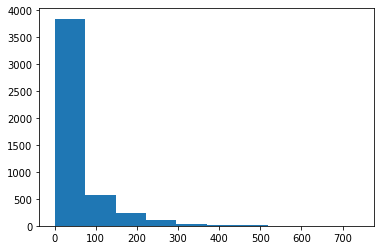

In [11]:
import matplotlib
from matplotlib import pyplot as plt
import math
# Number of votes distribution for all employees
plt.hist(churn_df["numVotes"])

(array([3.417e+03, 5.750e+02, 2.470e+02, 1.110e+02, 3.900e+01, 1.200e+01,
        1.200e+01, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([  0.,  74., 148., 222., 296., 370., 444., 518., 592., 666., 740.]),
 <BarContainer object of 10 artists>)

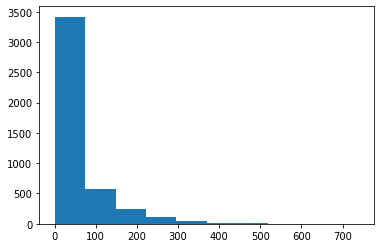

In [12]:
existing_employees = churn_df[churn_df['employee'] >= 0]
# Number of votes distribution for existing employees
plt.hist(existing_employees['numVotes'])


In [13]:
churned_employees = churn_df[churn_df['employee'] < 0]
# Number of votes distribution for churned employees
churned_employees.describe()

,employee,numVotes
count,429.000000,429.0
mean,-73.370629,0.0
std,62.181677,0.0
min,-218.000000,0.0
25%,-112.000000,0.0
50%,-56.000000,0.0
75%,-18.000000,0.0
max,-2.000000,0.0


^# NumVotes for churned_employees are all 0s...

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,employee,commentId,commentDate,commentPerDay
0,-217,2,1.0,2.000000
1,-216,6,7.0,0.857143
2,-214,2,1.0,2.000000
3,-213,2,1.0,2.000000
4,-212,2,1.0,2.000000
5,-211,2,1.0,2.000000
6,-210,2,1.0,2.000000
7,-209,10,7.0,1.428571
8,-208,14,8.0,1.750000
9,-207,4,4.0,1.000000


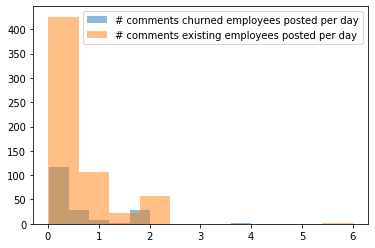

In [14]:
# Calculate the number of comments each employee left

cca_df['commentDate'] = pd.to_datetime(cca_df['commentDate']).dt.normalize()
count = cca_df.groupby(["employee"]).agg({"commentId": "count","commentDate": np.ptp})
# Convert comment date to date
count["commentDate"] = count["commentDate"].dt.days + 1

count["commentPerDay"] = count["commentId"]/ count["commentDate"]
count = count.reset_index()
churn_count = count[count["employee"] < 0]
nonchurn_count = count[count["employee"] >= 0]
plt.hist(churn_count['commentPerDay'], alpha=0.5, label="# comments churned employees posted per day")
plt.hist(nonchurn_count['commentPerDay'], alpha=0.5, label="# comments existing employees posted per day")
plt.legend()

count.head(20)